
z = 
 [-0.5  -0.38 -0.25 -0.12  0.    0.12  0.25  0.38  0.5 ]
###############################

u = 
 [-0.38 -0.25 -0.12  0.12  0.25  0.38]
###############################

M = 
 [[15.92  0.    0.    0.    0.    0.  ]
 [ 0.   15.92  0.    0.    0.    0.  ]
 [ 0.    0.   15.92  0.    0.    0.  ]
 [ 0.    0.    0.   15.92  0.    0.  ]
 [ 0.    0.    0.    0.   15.92  0.  ]
 [ 0.    0.    0.    0.    0.   15.92]]
###############################

Rz = 
 [[0.13 0.25 0.38 0.63 0.75 0.88]
 [0.01 0.13 0.25 0.5  0.63 0.75]
 [0.13 0.01 0.13 0.38 0.5  0.63]
 [0.25 0.13 0.01 0.25 0.38 0.5 ]
 [0.38 0.25 0.13 0.13 0.25 0.38]
 [0.5  0.38 0.25 0.01 0.13 0.25]
 [0.63 0.5  0.38 0.13 0.01 0.13]
 [0.75 0.63 0.5  0.25 0.13 0.01]
 [0.88 0.75 0.63 0.38 0.25 0.13]]
###############################

Ru = 
 [[0.01 0.13 0.25 0.5  0.63 0.75]
 [0.13 0.01 0.13 0.38 0.5  0.63]
 [0.25 0.13 0.01 0.25 0.38 0.5 ]
 [0.5  0.38 0.25 0.01 0.13 0.25]
 [0.63 0.5  0.38 0.13 0.01 0.13]
 [0.75 0.63 0.5  0.25 0.13 0.01]]
#########

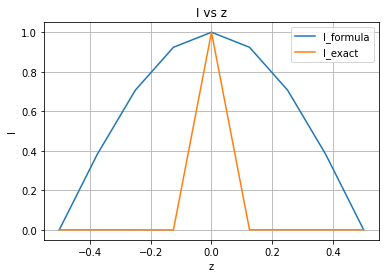

In [68]:
# -*- coding: utf-8 -*-
"""
Created on Thu May 12 10:28:07 2022

@author: Sasuke
"""

### Importing Libraries
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt


### Independent Parameters
l = 0.5;c = 2.9979e8 # Quarter wavelength, Speed of light
mu0 = 4*np.pi*1e-7 # Permeability of free space
N = 4 # Number of sections in each half of the antenna
Im = 1 # Current injected into the antenna
a = 0.01 # Radius of wire

### Dependent Parameters
Lambda = l*4;Freq = c/Lambda # Wavelength, Frequency
k = 2*np.pi/Lambda; dz = l/N # Wavenumber, Step Size


### Helper section and variables

def get_M(N = N, a = a):
    return 1/(2*np.pi*a)*np.identity(2*N-2)

def get_PB(RiN,a = a, dz = dz):
    k = np.pi
    return (mu0/(4*np.pi)*np.exp(-complex(0, k)*RiN)*dz/RiN).reshape(-1,1)
    
def get_P(R_u, dz = dz, a = a):
    k = np.pi
    return (mu0/(4*np.pi)*np.exp(-complex(0, k)*R_u)*dz)/(R_u)

def get_Rz(z, z_k, a = a):
    return np.sqrt(a**2 + (z_k - z)**2)

def get_Ru(z, z_u, a = a):
    return np.sqrt(a**2 + (z_u - z)**2)

def get_Q(R_u, P, dz = dz, a = a, mu0 = mu0):
    k = np.pi
    x = complex(0, -k)/R_u - 1/R_u**2
    return -a*P/mu0*x


def get_QB(PB, RiN, mu0 = mu0, a = a):
    k = np.pi
    x = complex(0, -k)/RiN - 1/RiN**2
    return -PB*a/mu0*x

### Question 1
z = np.linspace(-l, l, num = 2*N+1) # All locations

z_k = z[[0, N, -1]] # Known Current locations
I_approx = Im * np.sin(k*(l-z)) # I calculated from formula

#Helper index array
idx = np.ones((2*N + 1,), dtype = bool)
idx[[0, N, -1]] = False 
 
z_u = z[idx] # Helper Unknown Current locations
u = np.concatenate((z[1:N], z[N + 1 : 2 * N])) # Unknown current locations
J = np.zeros_like(u) # Unknown currents
 
### Question 2
M = get_M()

### Question 3

Ru = get_Ru(z_u, z_u.reshape(-1,1))
Rz = get_Rz(z_u ,z.reshape(-1,1))
Pb = get_PB(Rz[N,:])
P = get_P(Ru)

### Question 4

Qb = get_QB(Pb, Rz[N,:].reshape(-1,1))
Q = get_Q(Ru, P)

### Question 5

J = inv((M-Q)).dot(Qb*Im) # Calculating J

# Appending boundary conditiomns
I_exact = np.zeros((2*N+1,1), dtype = complex)
I_exact[1:2*N-1] += J
I_exact[N] = Im

### Printing all values
if N == 4: 

    print("\nz = \n", z.round(2))
    print("###############################")
    print("\nu = \n", u.round(2))
    print("###############################")
    print("\nM = \n", M.round(2))
    print("###############################")
    print("\nRz = \n", Rz.round(2))
    print("###############################")
    print("\nRu = \n", Ru.round(2))
    print("###############################")
    print("\nRiN = \n", Rz[N,:].round(2))
    print("###############################")
    print("\nP * 1e8 = \n", (P * 1e8).round(2))
    print("###############################")
    print("\nPB * 1e8 = \n", (Pb * 1e8).round(2))
    print("###############################")
    print("\nQ = \n", Q.round(2))
    print("###############################")
    print("\nQB = \n", Qb.round(2))
    print("###############################")
    print("\nJ = \n", J.round(8))
    print("###############################")
    print("\nI = \n", I_exact.round(2))
    print("###############################")
    print("\n")

### Plotting 
plt.figure()
plt.plot(z, I_approx, label = "I_formula")
plt.plot(z, I_exact, label = "I_exact")
plt.title("I vs z")
plt.xlabel("z");plt.ylabel("I")
plt.grid()
plt.legend()
plt.show()



